In [1]:
!pip install nibabel
!pip install torch
!pip install torch-summary
!pip install torchmetrics

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Importing the libraries

In [2]:
import pandas as pd
import math
import nibabel as nib
import os

In [3]:
data_csv = pd.read_csv("labels.csv") # Total 2059 entries

Counting images belonging to different lables

In [4]:
count_of_diff_lables = {"Y-N":0, "Y-Y":0, "N-Y":0, "N-N":0}

'''
Y-N = Input image consists of recognizable facial features with no brain feature loss.
Y-Y = Input image consists of recognizable facial features and brain features are lost. => Image has only facial features.
N-Y = Input image doesn't have recognizable facial features and there are brain features loss.
N-N = Input image doesn't have recognizable facial features and there is no brain feature loss. => perfect desired sample.
'''

data_csv_shape = data_csv.shape
data_y_n = []
data_y_y = []
data_n_y = []
data_n_n = []

for row_num in range(data_csv_shape[0]):
    if data_csv.iloc[row_num][1] == "Yes" and data_csv.iloc[row_num][2] == "No":
        count_of_diff_lables["Y-N"] = count_of_diff_lables["Y-N"] + 1
        data_y_n.append(data_csv.iloc[row_num])
    elif data_csv.iloc[row_num][1] == "Yes" and data_csv.iloc[row_num][2] == "Yes":
        count_of_diff_lables["Y-Y"] = count_of_diff_lables["Y-Y"] + 1
        data_y_y.append(data_csv.iloc[row_num])
    elif data_csv.iloc[row_num][1] == "No" and data_csv.iloc[row_num][2] == "Yes":
        count_of_diff_lables["N-Y"] = count_of_diff_lables["N-Y"] + 1
        data_n_y.append(data_csv.iloc[row_num])
    elif data_csv.iloc[row_num][1] == "No" and data_csv.iloc[row_num][2] == "No":
        count_of_diff_lables["N-N"] = count_of_diff_lables["N-N"] + 1
        data_n_n.append(data_csv.iloc[row_num])
        
print(count_of_diff_lables) #{'Y-N': 713, 'Y-Y': 0, 'N-Y': 1332, 'N-N': 15}
data_y_n = pd.DataFrame(data_y_n)
data_y_y = pd.DataFrame(data_y_y)
data_n_y = pd.DataFrame(data_n_y)
data_n_n = pd.DataFrame(data_n_n)

{'Y-N': 713, 'Y-Y': 0, 'N-Y': 1332, 'N-N': 15}


Train-Validation-Test splitting

In [5]:
data_y_n_shape = data_y_n.shape
data_y_y_shape = data_y_y.shape
data_n_y_shape = data_n_y.shape
data_n_n_shape = data_n_n.shape

training_samples = pd.DataFrame()
validation_samples = pd.DataFrame()
testing_samples = pd.DataFrame()

#Y-N samples
training_split_y_n = math.ceil(0.6*data_y_n_shape[0])
validation_split_y_n = math.floor(data_y_n_shape[0]*0.2)

training_samples_y_n = pd.DataFrame(data_y_n.iloc[0:training_split_y_n])
validation_samples_y_n = pd.DataFrame(data_y_n.iloc[training_split_y_n: training_split_y_n + validation_split_y_n])
testing_samples_y_n = pd.DataFrame(data_y_n.iloc[(training_split_y_n + validation_split_y_n):])

print("training_y_n samples size = ", training_samples_y_n.shape)
print("validation_y_n samples size = ", validation_samples_y_n.shape)
print("testing_y_n samples size = ", testing_samples_y_n.shape)

#Y-Y samples
training_split_y_y = math.ceil(0.6*data_y_y_shape[0])
validation_split_y_y = math.floor(data_y_y_shape[0]*0.2)

training_samples_y_y = pd.DataFrame(data_y_y.iloc[0:training_split_y_y])
validation_samples_y_y = pd.DataFrame(data_y_y.iloc[training_split_y_y: training_split_y_y + validation_split_y_y])
testing_samples_y_y = pd.DataFrame(data_y_y.iloc[(training_split_y_y + validation_split_y_y):])

print("training_y_y samples size = ", training_samples_y_y.shape)
print("validation_y_y samples size = ", validation_samples_y_y.shape)
print("testing_y_y samples size = ", testing_samples_y_y.shape)

#N-Y samples
training_split_n_y = math.ceil(0.6*data_n_y_shape[0])
validation_split_n_y = math.floor(data_n_y_shape[0]*0.2)

training_samples_n_y = pd.DataFrame(data_n_y.iloc[0:training_split_n_y])
validation_samples_n_y = pd.DataFrame(data_n_y.iloc[training_split_n_y: training_split_n_y + validation_split_n_y])
testing_samples_n_y = pd.DataFrame(data_n_y.iloc[(training_split_n_y + validation_split_n_y):])

print("training_n_y samples size = ", training_samples_n_y.shape)
print("validation_n_y samples size = ", validation_samples_n_y.shape)
print("testing_n_y samples size = ", testing_samples_n_y.shape)

#N-N samples
training_split_n_n = math.ceil(0.6*data_n_n_shape[0])
validation_split_n_n = math.floor(data_n_n_shape[0]*0.2)

training_samples_n_n = pd.DataFrame(data_n_n.iloc[0:training_split_n_n])
validation_samples_n_n = pd.DataFrame(data_n_n.iloc[training_split_n_n: training_split_n_n + validation_split_n_n])
testing_samples_n_n = pd.DataFrame(data_n_n.iloc[(training_split_n_n + validation_split_n_n):])

print("training_n_n samples size = ", training_samples_n_n.shape)
print("validation_n_n samples size = ", validation_samples_n_n.shape)
print("testing_n_n samples size = ", testing_samples_n_n.shape)

training_y_n samples size =  (428, 3)
validation_y_n samples size =  (142, 3)
testing_y_n samples size =  (143, 3)
training_y_y samples size =  (0, 0)
validation_y_y samples size =  (0, 0)
testing_y_y samples size =  (0, 0)
training_n_y samples size =  (800, 3)
validation_n_y samples size =  (266, 3)
testing_n_y samples size =  (266, 3)
training_n_n samples size =  (9, 3)
validation_n_n samples size =  (3, 3)
testing_n_n samples size =  (3, 3)


In [6]:
#Training samples
training_samples = training_samples_y_n.append(training_samples_n_y, ignore_index=True)
training_samples = training_samples.append(training_samples_n_n, ignore_index=True)
#Shuffling the data set
training_samples = training_samples.sample(n = training_samples.shape[0], axis=0)
print("Size of training data = ", training_samples.shape)
training_labels = [[1 if training_samples.iloc[row][1] == "Yes" else 0, 
                    1 if training_samples.iloc[row][2] == "Yes" else 0] for row in range(training_samples.shape[0])]

#Validation samples
validation_samples = validation_samples_y_n.append(validation_samples_n_y, ignore_index=True)
validation_samples = validation_samples.append(validation_samples_n_n, ignore_index=True)
#Shuffling the data set
validation_samples = validation_samples.sample(n = validation_samples.shape[0], axis=0)
print("Size of validation data = ", validation_samples.shape)
validation_labels = [[1 if validation_samples.iloc[row][1] == "Yes" else 0, 
                      1 if validation_samples.iloc[row][2] == "Yes" else 0] for row in range(validation_samples.shape[0])]

#Testing samples
testing_samples = testing_samples_y_n.append(testing_samples_n_y, ignore_index=True)
testing_samples = testing_samples.append(testing_samples_n_n, ignore_index=True)
#Shuffling the data set
testing_samples = testing_samples.sample(n = testing_samples.shape[0], axis=0)
print("Size of testing data = ", testing_samples.shape)
testing_labels = [[1 if testing_samples.iloc[row][1] == "Yes" else 0, 
                   1 if testing_samples.iloc[row][2] == "Yes" else 0] for row in range(testing_samples.shape[0])]


Size of training data =  (1237, 3)
Size of validation data =  (411, 3)
Size of testing data =  (412, 3)


/local_scratch/pbs.484873.pbs02/ipykernel_3937719/393655029.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_samples = training_samples_y_n.append(training_samples_n_y, ignore_index=True)
/local_scratch/pbs.484873.pbs02/ipykernel_3937719/393655029.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_samples = training_samples.append(training_samples_n_n, ignore_index=True)
/local_scratch/pbs.484873.pbs02/ipykernel_3937719/393655029.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_samples = validation_samples_y_n.append(validation_samples_n_y, ignore_index=True)
/local_scratch/pbs.484873.pbs02/ipykernel_3937719/393655029.py:12: FutureWarning: The frame.append method is deprecated and will b

In [7]:
#Checking if the datasets contain any null values
print("Are there any null values in training samples = ", training_samples.isnull().values.any())
print("Are there any null values in validation samples = ", validation_samples.isnull().values.any())
print("Are there any null values in testing samples = ", testing_samples.isnull().values.any())

Are there any null values in training samples =  False
Are there any null values in validation samples =  False
Are there any null values in testing samples =  False


In [10]:
path = "files/"
extension = ".gz"
image = nib.load(os.path.join(path, training_samples.iloc[0][0] + extension))
print(image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       0.9375   0.9375   1.200002 1.       1.       1.       1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 32767
glmin           : 0
descrip         : b'bse -n 3 -d 25 -s 0.84 -r 2 -i ixi_dataset/IXI156-Guys-0837-T1.nii.gz'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.4382675
quatern_c       : 0.47557345
quater

Visualizing the data.

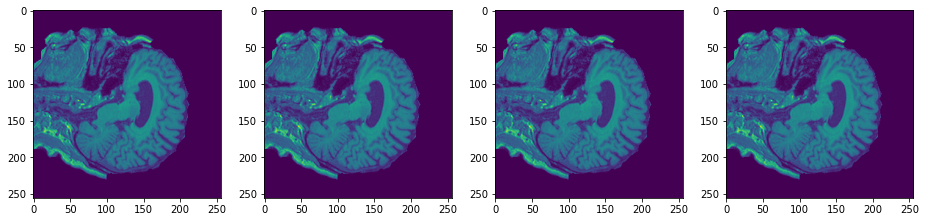

In [37]:
#Load the image
import matplotlib.pyplot as plt
import numpy as np

path = "files/"
extension = ".gz"
for row in range(training_samples.shape[0]):
    image = nib.load(os.path.join(path, training_samples.iloc[row][0] + extension))
    image_array = image.get_fdata()
    image_array = image_array/255
    
    for i in range(1,5):
        plt.subplot(5, 5,i + 1)
        plt.imshow(image_array[:,:,(70)])
        plt.gcf().set_size_inches(20, 20)
    plt.show()
    break
    

In [9]:
import torch
from torch.utils.data import Dataset
import numpy as np

#Creating custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.path = "files/"
        self.extension = ".gz"
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):  
        image = nib.load(os.path.join(self.path, self.data.iloc[idx][0] + self.extension)).get_fdata()
        #Preprocessing - scaling image pixel values to 0-1 by performing Min-Max normalization.
        max_pixel = np.amax(image)
        min_pixel = np.amin(image)
        image = (image - min_pixel) / (max_pixel - min_pixel)
        #Extracting the first 130 channels as they have most important information. 
        image = image[:,:,0:64]
        image = torch.tensor(image, dtype=torch.float64, device='cuda')
        #Expanding the dimensions of the image. Converting (x,x,x) to  (x,x,x,1)
        image = torch.unsqueeze(image, 3)
        image = torch.reshape(image, (image.shape[3], image.shape[2], image.shape[0], image.shape[1]))

        label_1 = 1 if self.data.iloc[idx][1] == "Yes" else 0 
        label_1 = torch.tensor(label_1, device = self.device, dtype=torch.float64)
        label_2 = 1 if self.data.iloc[idx][2] == "Yes" else 0
        label_2 = torch.tensor(label_2, device = self.device, dtype=torch.float64)
    
        return image, label_1, label_2

In [27]:
import torch
import torchsummary
from torch import nn
from torchsummary import summary


#Model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.layers = nn.Sequential(
            nn.Conv3d(in_channels = 1, out_channels = 5, kernel_size = (3, 3, 3), stride = 2, padding = 0, bias = True, device=device, dtype=torch.float64),
            nn.ReLU(inplace=False),
            nn.MaxPool3d(kernel_size = 3, stride = 2),
            nn.BatchNorm3d(5, device=device, dtype=torch.float64),
            
            nn.Conv3d(in_channels = 5, out_channels = 3, kernel_size = (3, 3, 3), stride = 1, padding = 0, bias = True, device=device, dtype=torch.float64),
            nn.ReLU(inplace=False),
            nn.MaxPool3d(kernel_size = 3, stride = 2),
            nn.BatchNorm3d(3, device=device, dtype=torch.float64),
            
            nn.Conv3d(in_channels = 3, out_channels = 2, kernel_size = (3, 3, 3), stride = 1, padding = 0, bias = True, device=device, dtype=torch.float64),
            nn.ReLU(inplace=False),
            nn.MaxPool3d(kernel_size = 3, stride = 2),
            nn.BatchNorm3d(2, device=device, dtype=torch.float64),
    
            nn.Flatten(),

            nn.Linear(in_features = 338, out_features = 9, bias = True, device = 'cuda', dtype=torch.float64),
            # nn.Linear(in_features = 30, out_features = 9, bias = True, device = 'cuda', dtype=torch.float64),
            nn.Linear(in_features = 9, out_features = 2, bias = True, device = 'cuda', dtype=torch.float64),
            nn.Sigmoid()
        )
        
    def forward(self, input_image):
        return self.layers(input_image)

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = nn.Sequential(
            nn.Conv3d(in_channels = 1, out_channels = 5, kernel_size = (3, 3, 3), stride = 2, padding = 0, bias = True, device=device, dtype=torch.float64),
            nn.ReLU(inplace=False),
            nn.MaxPool3d(kernel_size = 3, stride = 2),
            nn.BatchNorm3d(5, device=device, dtype=torch.float64),
            
            nn.Conv3d(in_channels = 5, out_channels = 3, kernel_size = (3, 3, 3), stride = 1, padding = 0, bias = True, device=device, dtype=torch.float64),
            nn.ReLU(inplace=False),
            nn.MaxPool3d(kernel_size = 3, stride = 2),
            nn.BatchNorm3d(3, device=device, dtype=torch.float64),
            
            nn.Conv3d(in_channels = 3, out_channels = 2, kernel_size = (3, 3, 3), stride = 1, padding = 0, bias = True, device=device, dtype=torch.float64),
            nn.ReLU(inplace=False),
            nn.MaxPool3d(kernel_size = 3, stride = 2),
            nn.BatchNorm3d(2, device=device, dtype=torch.float64),
    
            # nn.Conv3d(in_channels = 3, out_channels = 2, kernel_size = (3, 3, 3), stride = 1, padding = 0, bias = True, device=device, dtype=torch.float64),
            # nn.ReLU(inplace=False),
            # nn.MaxPool3d(kernel_size = 3, stride = 2),
            # nn.BatchNorm3d(2, device=device, dtype=torch.float64),
    
            nn.Flatten(),

            nn.Linear(in_features = 338, out_features = 9, bias = True, device = 'cuda', dtype=torch.float64),
            # nn.Linear(in_features = 30, out_features = 9, bias = True, device = 'cuda', dtype=torch.float64),
            nn.Linear(in_features = 9, out_features = 2, bias = True, device = 'cuda', dtype=torch.float64),
            nn.Sigmoid()
        )

summary(model, (1, 64,256,256), dtypes=[torch.float64])

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv3d: 1-1                            [-1, 5, 31, 127, 127]     140
├─ReLU: 1-2                              [-1, 5, 31, 127, 127]     --
├─MaxPool3d: 1-3                         [-1, 5, 15, 63, 63]       --
├─BatchNorm3d: 1-4                       [-1, 5, 15, 63, 63]       10
├─Conv3d: 1-5                            [-1, 3, 13, 61, 61]       408
├─ReLU: 1-6                              [-1, 3, 13, 61, 61]       --
├─MaxPool3d: 1-7                         [-1, 3, 6, 30, 30]        --
├─BatchNorm3d: 1-8                       [-1, 3, 6, 30, 30]        6
├─Conv3d: 1-9                            [-1, 2, 4, 28, 28]        164
├─ReLU: 1-10                             [-1, 2, 4, 28, 28]        --
├─MaxPool3d: 1-11                        [-1, 2, 1, 13, 13]        --
├─BatchNorm3d: 1-12                      [-1, 2, 1, 13, 13]        4
├─Flatten: 1-13                          [-1, 338]                 --
├─Linear: 1-14

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv3d: 1-1                            [-1, 5, 31, 127, 127]     140
├─ReLU: 1-2                              [-1, 5, 31, 127, 127]     --
├─MaxPool3d: 1-3                         [-1, 5, 15, 63, 63]       --
├─BatchNorm3d: 1-4                       [-1, 5, 15, 63, 63]       10
├─Conv3d: 1-5                            [-1, 3, 13, 61, 61]       408
├─ReLU: 1-6                              [-1, 3, 13, 61, 61]       --
├─MaxPool3d: 1-7                         [-1, 3, 6, 30, 30]        --
├─BatchNorm3d: 1-8                       [-1, 3, 6, 30, 30]        6
├─Conv3d: 1-9                            [-1, 2, 4, 28, 28]        164
├─ReLU: 1-10                             [-1, 2, 4, 28, 28]        --
├─MaxPool3d: 1-11                        [-1, 2, 1, 13, 13]        --
├─BatchNorm3d: 1-12                      [-1, 2, 1, 13, 13]        4
├─Flatten: 1-13                          [-1, 338]                 --
├─Linear: 1-14

In [11]:
from tabulate import tabulate

def tabulate_epoch_meter(elapsed_time, acc, loss, metrics = None):
    """ Tabulate total average value of meters every epoch.

    Args:
        eplased_time (float): The elapsed time of a epoch.
        meter_list (list or tuple of AverageMeter): A list of meters.
    """
    epoch_metric = {}
    epoch_metric["Accuracy"] = [acc]
    epoch_metric["loss"] = [loss]
    epoch_metric["time"] = [elapsed_time]
    table = tabulate(epoch_metric, headers="keys", tablefmt="github", floatfmt=".5f")
    table = table.split("\n")
    table = "\n".join([table[1]] + table)
    print(table)
    if metrics != None:
        headers = ["sensitivity_ff", "sensitivity_bl", "specificity_ff", "specificity_bl"]
        print(tabulate(metrics.items(), headers = headers))

In [13]:
def cal_acc(actual, predicted):
    if len(actual) != len(predicted):
        print("[ERROR] actual and predicted doesn't have same shape")
        return
    
    correctly_predicted_recog_facial_features = [actual[row][0]==predicted[row][0] for row in range(len(actual))]
    correctly_predicted_brain_feature_loss = [actual[row][1]==predicted[row][1] for row in range(len(actual))]
    
    facial_features_acc = (sum(correctly_predicted_recog_facial_features) / len(actual)) * 100
    brain_loss_acc = (sum(correctly_predicted_brain_feature_loss) / len(actual)) * 100
    return (facial_features_acc, brain_loss_acc) 

In [14]:

def cal_confusion_matrices(actual, predicted):
    if len(actual) != len(predicted):
        print("[ERROR] actual and predicted doesn't have same shape")
        return
    
    confusion_matrics_ff = torch.zeros(2, 2)
    confusion_matrics_bl = torch.zeros(2, 2)
    
    for row in range(len(actual)):
        row = predicted[row][0]
        col = actual[row][0]
        confusion_matrics_ff[row][col] = confusion_matrics_ff[row][col] + 1
        
        row = predicted[row][1]
        col = actual[row][1]
        confusion_matrics_bl[row][col] = confusion_matrics_bl[row][col] + 1
        
    return {"confusion_matrics_ff": confusion_matrics_ff, "confusion_matrics_bl": confusion_matrics_bl}
        

In [15]:
def cal_sensitivity(confusion_matrix):
    return (confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[0][1])

In [16]:
def cal_specificity(confusion_matrix):
    return (confusion_matrix[1][1]) / (confusion_matrix[1][0] + confusion_matrix[1][1])

In [17]:
def unpack_labels(label_1, label_2):
    labels = []
    for row in range(len(label_1)):
        labels.append([label_1[row], label_2[row]])
  
    return labels

In [18]:
def save_checkpoint(state, epochs):
    filepath = "Model/model_after_" + str(epochs) + "_epochs.tar"
    torch.save(state, filepath)
    print('[info] Finish saving the model')

Training the model


In [19]:
training_accuracies = []
validation_accuracies = []
training_losses = []
validation_losses = []

In [20]:
def train(model, train_loader, optimizer) :
    predicted_val = []
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.train() 
    
    for batch_idx, batch in enumerate(train_loader):
        image = batch[0]
        label_1 = batch[1]
        label_2 = batch[2]
        labels = unpack_labels(label_1, label_2)
        labels = torch.tensor(labels, device=device, dtype = torch.float64)

        y_pred = model(image)
        #print("len of y_pred = ", len(y_pred))
        
        binary_crossentropy_loss = nn.BCELoss()
        loss = binary_crossentropy_loss(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Check the threshold
        for row in range(len(y_pred)):
            pred_lables = []
            if y_pred[row][0] >= 0.4:
                pred_lables.append(1)
            else:
                pred_lables.append(0)
            if y_pred[row][1] >= 0.4:
                pred_lables.append(1)
            else:
                pred_lables.append(0)
            predicted_val.append(pred_lables)

    return predicted_val, loss

In [21]:
def test(model, val_loader):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    model.eval()
    loss = []
    predicted_val = []
    start_time = time.time()
    for batch_idx, batch in enumerate(val_loader):
        image = batch[0]
        label_1 = batch[1]
        label_2 = batch[2]
        labels = unpack_labels(label_1, label_2)
        labels = torch.tensor(labels, device=device, dtype = torch.float64)
    
        with torch.no_grad():
            y_pred = model(image)
            binary_crossentropy_loss = nn.BCELoss()
            loss_ = binary_crossentropy_loss(y_pred, labels)
            loss.append(loss_)

        #Check the threshold
        for row in range(len(y_pred)):
            pred_lables = []
            if y_pred[row][0] >= 0.4:
                pred_lables.append(1)
            else:
                pred_lables.append(0)
            if y_pred[0][1] >= 0.4:
                pred_lables.append(1)
            else:
                pred_lables.append(0)
            predicted_val.append(pred_lables)

    acc = cal_acc(validation_labels, predicted_val)
    validation_accuracies.append(acc)
    validation_losses.append(sum(loss)/len(loss))
    
    conf_matrices = cal_confusion_matrices(validation_labels, predicted_val)
    
    sensitivity_ff = cal_sensitivity(conf_matrices['confusion_matrics_ff'])
    sensitivity_bl = cal_sensitivity(conf_matrices['confusion_matrics_bl'])
    
    specificity_ff = cal_specificity(conf_matrices['confusion_matrics_ff'])
    specificity_bl = cal_specificity(conf_matrices['confusion_matrics_bl'])
    
    metrics = {'sensitivity_ff': sensitivity_ff,
               'sensitivity_bl': sensitivity_bl,
               'specificity_ff': specificity_ff,
               'specificity_bl': specificity_bl}
    
    print("-----Validation accuracy and avg loss are-----")
    tabulate_epoch_meter(time.time() - start_time, acc, sum(loss)/len(loss), metrics)



In [28]:
import time
from torchmetrics.classification import MultilabelAccuracy
import numpy as np

model = Model()
epochs = 35
lr = 1e-4
batch_size = 50
train_loader = torch.utils.data.DataLoader(CustomDataset(training_samples), batch_size = batch_size)
val_loader = torch.utils.data.DataLoader(CustomDataset(validation_samples), batch_size = batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
start_time = time.time()

for epoch in range(epochs):
    print("-----Starting Epoch-{}-----".format(epoch))
    predicted_values, loss = train(model, train_loader, optimizer)
    acc = cal_acc(training_labels, predicted_values)
    training_accuracies.append(acc)
    training_losses.append(loss)
    
    tabulate_epoch_meter(time.time() - start_time, acc, loss.item())
    
    if epoch % 10 == 0:
        print("-----Starting validating the model-----")
        test(model, val_loader)
        
save_checkpoint({'epoch': epoch + 1,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict()}, epochs)


-----Starting Epoch-0-----
|---------------------------------------|---------|-----------|
| Accuracy                              |    loss |      time |
|---------------------------------------|---------|-----------|
| (44.78577202910267, 64.6725949878739) | 0.55963 | 186.01925 |
-----Starting validating the model-----
-----Validation accuracy and avg loss are-----
|----------------------------------------|---------|----------|
| Accuracy                               |    loss |     time |
|----------------------------------------|---------|----------|
| (34.54987834549878, 64.72019464720195) | 0.67466 | 60.71592 |
sensitivity_ff      sensitivity_bl
----------------  ----------------
sensitivity_ff                 nan
sensitivity_bl                 nan
specificity_ff                   0
specificity_bl                   1
-----Starting Epoch-1-----
|---------------------------------------|---------|-----------|
| Accuracy                              |    loss |      time |
|--------

In [29]:
#Saving accuracies

accuracies = {}
accuracies["training_accuracies"] = training_accuracies
accuracies["validation_accuracies"] = validation_accuracies

losses = {}
losses["training_losses"] = training_losses
losses["validation_losses"] = validation_losses

f = open("metrics.txt","w")

# write file
f.write(str(accuracies))
f.write(str(losses) )

# close file
f.close()

Testing the trained model

In [30]:
import time

gpu = torch.cuda.current_device()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_for_testing = Model()
model_for_testing.cuda(gpu)

saved_model = torch.load('Model/model_after_35_epochs.tar', map_location="cuda:{}".format(gpu))
model_for_testing.load_state_dict(saved_model["state_dict"])

batch_size = 100
test_loader = torch.utils.data.DataLoader(CustomDataset(testing_samples), batch_size = batch_size)

model_for_testing.eval()
loss = []
predicted_val = []
start_time = time.time()
for batch_idx, batch in enumerate(test_loader):
    image = batch[0]
    label_1 = batch[1]
    label_2 = batch[2]
    labels = unpack_labels(label_1, label_2)
    labels = torch.tensor(labels, device=device, dtype = torch.float64)
    
    with torch.no_grad():
        y_pred = model_for_testing(image)
        binary_crossentropy_loss = nn.BCELoss()
        loss_ = binary_crossentropy_loss(y_pred, labels)
        loss.append(loss_)

    #Check the threshold
    for row in range(len(y_pred)):
        pred_lables = []
        if y_pred[row][0] >= 0.4:
            pred_lables.append(1)
        else:
            pred_lables.append(0)
        if y_pred[0][1] >= 0.4:
            pred_lables.append(1)
        else:
            pred_lables.append(0)
        predicted_val.append(pred_lables)
        
test_acc = cal_acc(testing_labels, predicted_val)
conf_matrices = cal_confusion_matrices(testing_labels, predicted_val)
    
sensitivity_ff = cal_sensitivity(conf_matrices['confusion_matrics_ff'])
sensitivity_bl = cal_sensitivity(conf_matrices['confusion_matrics_bl'])
    
specificity_ff = cal_specificity(conf_matrices['confusion_matrics_ff'])
specificity_bl = cal_specificity(conf_matrices['confusion_matrics_bl'])
    
metrics = {'sensitivity_ff': sensitivity_ff,
               'sensitivity_bl': sensitivity_bl,
               'specificity_ff': specificity_ff,
               'specificity_bl': specificity_bl}

print("-----Testing accuracy and avg loss are-----")
tabulate_epoch_meter(time.time() - start_time, test_acc, sum(loss)/len(loss), metrics)

-----Testing accuracy and avg loss are-----
|----------------------------------------|---------|----------|
| Accuracy                               |    loss |     time |
|----------------------------------------|---------|----------|
| (88.83495145631069, 48.54368932038835) | 0.32848 | 66.94941 |
sensitivity_ff      sensitivity_bl
----------------  ----------------
sensitivity_ff                   0
sensitivity_bl                   1
specificity_ff                   1
specificity_bl                 nan


In [70]:
import re

f = open("copy_metrics.txt","r")
accuracies = f.read()

training_acc = accuracies.split("\n")[0].split(":")[1]
training_accuracies = eval(training_acc)

validation_acc = accuracies.split("\n")[1].split(":")[1]
validation_accuracies = eval(validation_acc)

training_loss = accuracies.split("\n")[2].split(":")[1]
training_losses = eval(training_loss)

validation_loss = accuracies.split("\n")[3].split(":")[1]
validation_losses = eval(validation_loss)

Plotting training accuracy vs epochs

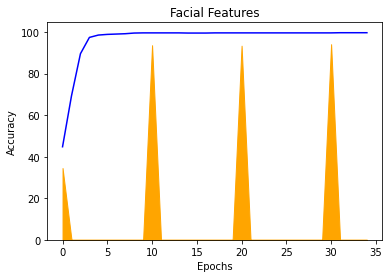

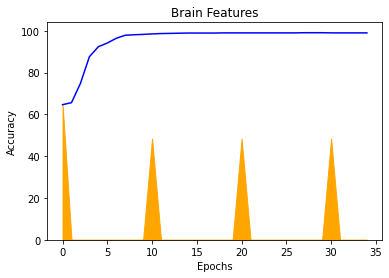

In [72]:
# facial_features_acc, brain_loss_acc
import matplotlib.pyplot as plt

training_accuracies_ff_acc = []
training_accuracies_bl_acc = []
validation_accuracies_ff_acc = []
validation_accuracies_bl_acc = []
epochs = []
val_counter = 0
for row in range(len(training_accuracies)):
    training_accuracies_ff_acc.append(training_accuracies[row][0])
    training_accuracies_bl_acc.append(training_accuracies[row][1])
    epochs.append(row)
    if row % 10 == 0:
        validation_accuracies_ff_acc.append(validation_accuracies[val_counter][0])
        validation_accuracies_bl_acc.append(validation_accuracies[val_counter][1])
        val_counter = val_counter + 1
    else:
        validation_accuracies_ff_acc.append(0)
        validation_accuracies_bl_acc.append(0)

#Facial Features
#Training accuracies
plt.plot(epochs, training_accuracies_ff_acc, color="blue")

#Validation accuracies
plt.stackplot(epochs, validation_accuracies_ff_acc, color="orange")

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Facial Features')
plt.show()

#Brain Features
#Training accuracies
plt.plot(epochs, training_accuracies_bl_acc, color="blue")

#Validation accuracies
plt.stackplot(epochs, validation_accuracies_bl_acc, color="orange")

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Brain Features')
plt.show()

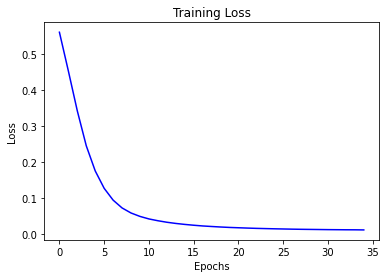

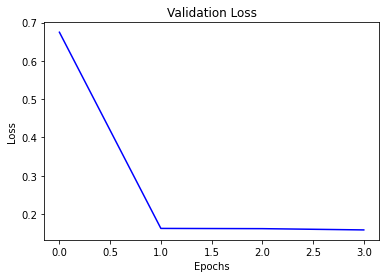

In [73]:
# facial_features_acc, brain_loss_acc
import matplotlib.pyplot as plt

#Training losses
plt.plot(epochs, training_losses, color="blue")

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training Loss')
plt.show()

#Validation Losses
plt.plot(range(len(validation_losses)), validation_losses, color="blue")

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Validation Loss')
plt.show()